<div dir='rtl'>
ابتدا توزیع تعداد گام‌ها به تفکیک روز هفته را رسم کنید. سپس میانگین این مقدار را برای فصل‌های مختلف رسم کنید.
</div>



In [1]:
import pyarrow.parquet as pa 
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_steps_lights = pd.read_csv('../data/all_data_steps_light.csv')
df_steps_lights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25763 entries, 0 to 25762
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25763 non-null  int64  
 1   day_number        25763 non-null  int64  
 2   weekday           25763 non-null  int64  
 3   daily_light_mean  25763 non-null  float64
 4   daily_steps       25763 non-null  int64  
 5   quarter           25763 non-null  int64  
 6   user_id           25763 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 1.4+ MB


In [3]:
df_weekday_steps = pd.DataFrame(df_steps_lights.groupby(by=['weekday'], as_index=False)['daily_steps'].mean())
df_weekday_steps.head(10)

,weekday,daily_steps
0,1,2505.167545
1,2,2585.222132
2,3,2601.242941
3,4,2592.020210
4,5,2686.565058
5,6,2510.480422
6,7,2332.098933


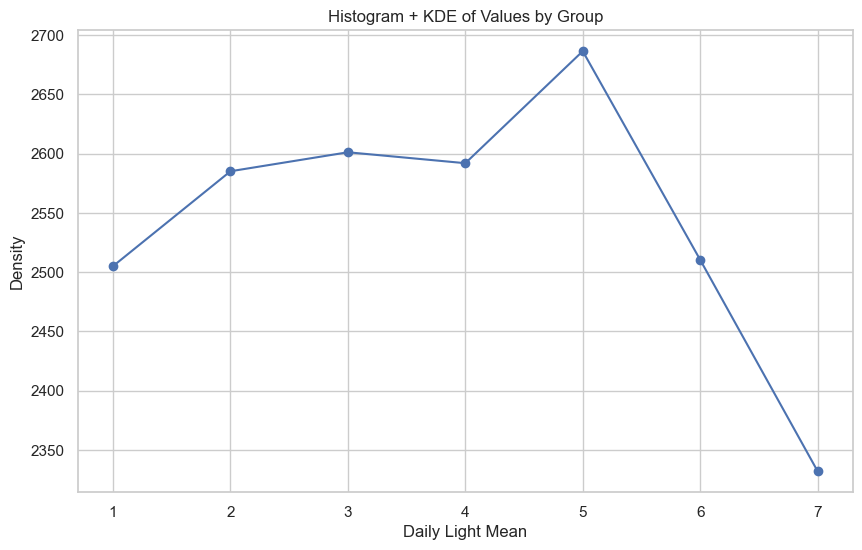

In [6]:
sns.set(style="whitegrid")  # a nice background style for clarity

# ----------------- (a) Histogram + KDE Overlay ------------------------
plt.figure(figsize=(10, 6))

plt.plot(df_weekday_steps['weekday'], df_weekday_steps['daily_steps'], 'o', ls='-', label='steps')

plt.title('Histogram + KDE of Values by Group')
plt.xlabel('Daily Light Mean')
plt.ylabel('Density')
# plt.legend(title='Sleep')
plt.show()

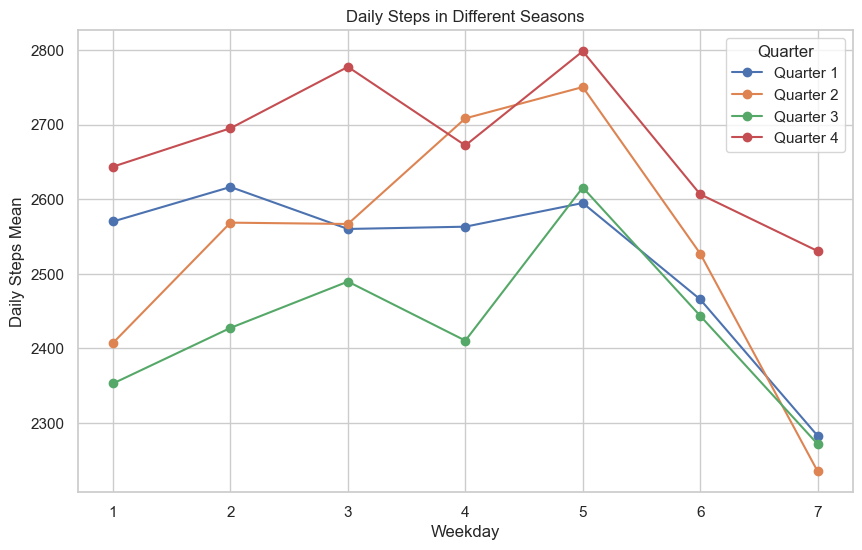

In [5]:
df_q_weekday_steps = pd.DataFrame(df_steps_lights.groupby(by=['weekday', 'quarter'], as_index=False)['daily_steps'].mean())
df_q_weekday_steps.head(10)

sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6))
for i in range(4):
    df_quarter = df_q_weekday_steps[df_q_weekday_steps['quarter'] == i+1]
    plt.plot(df_quarter['weekday'], df_quarter['daily_steps'], 'o', ls='-', label='Quarter {}'.format(i+1))

plt.title('Daily Steps in Different Seasons')
plt.xlabel('Weekday')
plt.ylabel('Daily Steps Mean')
plt.legend(title='Quarter')
plt.show()